Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = "양동훈"
COLLABORATORS = "python"

---

## Problem #2 (30pt)

A spherical projectile of mass $m$ launched with an initial velocity moves under the influence of two forces: gravity ($F_g = mg$) and aerodynamic drag ($D$), computed using the drag coefficient:  

$$
C_D=\frac{D}{0.5 \rho V^2 S_{ref}}
$$

where:  
- $m$: mass of the sphere,  
- $\rho$: air density,  
- $V$: magnitude of velocity,  
- $S_{ref}$: reference area.  

In the *xz*-plane, the equations of motion are given by:  

$$
\begin{align}
m \ddot{x} &= - 0.5 C_D \rho S_{ref} \sqrt{\dot{x}^2 + \dot{z}^2} \dot{x}, \\
m \ddot{z} &= - 0.5 C_D \rho S_{ref} \sqrt{\dot{x}^2 + \dot{z}^2} \dot{z} - mg.
\end{align}
$$

### Parameters:
- $m = 0.2 \text{kg}$, $C_D = 0.47$,  
- Radius of sphere: $r = 0.05 \, \text{m}$,  
- Reference area: $S_{ref} = \pi r^2$,  
- Gravitational acceleration: $g = 9.81 \, \text{m/s}^2$,  
- Air density: $\rho = 1.225 \, \text{kg/m}^3$.  

The sphere is launched with an initial velocity $V_0 = 100 \, \text{m/s}$ at an angle $\phi_0 = 65^\circ$.

---

### Tasks:

**(a)** Derive the first-order ordinary differential equations (ODEs) (6pt) 


**(b)** Solve the problem numerically using(8pt):  
   - **Explicit Euler Method**  
   - **4th-Order Runge-Kutta Method**  

   Simulate the motion for $t \in (0, 10)$.  

   - Use different time steps: $\Delta t = 0.05, 0.1, 0.5, 1.0$.  
   - Compare the trajectories obtained from both methods for each time step by comparing the two graphs.  
   - Discuss the accuracy and stability of the methods for different time steps. 
   
**(c)** Compute the range of the projectile as follows(8pt):  
   - Find the first index *i* where z < 0 using `np.where` function:
       * for a numpy array ```a = np.array([1, 2, 3, -1, -2])```, you can find the first index for a negative value as:  
        ```python
        np.where(a < 0)[0][0]
        ```  
        
   - Interpolation $z$ values at $z_{i-2}, z_{i-1}, z_{i}$ and $z_{i+1}$ to calculate the time and distance (x) at $z=0$.
       * use your own function to compute interpolation using Lagrange polynomial method.
       * use 4th-Order Runge-Kutta Method, $\Delta t = 0.1$
      
**(d)** Calculate two launch angles, whose range is exactly $120 m$. (8pt)
   - Write a function $f(\phi)$ to compute the range  as a function of the launch angle $\phi$.
   - Plot the relation between angle $\phi \in (5^{\circ}, 85^{\circ})$ and the range $f(\phi)$. 
   - Find a root for $f(\phi) - 60 = 0$ using `scipy.optimize.root_scalar` or any methods you have made in this lecture.
   - Compute the flight time difference for the two launch angles.

In [3]:
# Write your answer(a)
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [4]:
#solve ivp 함수
def runge_kutta4(f, tspan, y0, h):
    """
    Explicit Euler Method
    
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h) 
    t = np.insert(t, len(t), tspan[1])

    y = np.empty((len(y0), len(t)))
    y[:, 0] = y0

    for i, ti in enumerate(t) :
        if i < len(t) - 1:
            k1 = f(ti, y[:,i])
            k2 = f(ti + 1/2*h, y[:,i] + 1/2*k1*h)
            k3 = f(ti + 1/2*h, y[:,i] + 1/2*k2*h)
            k4 = f(ti + h, y[:,i] + k3*h)
            y[:,i+1] = y[:,i] + h*(k1 + 2*k2 + 2*k3 + k4)/6

    return t, y

def explicit_euler(f, tspan, y0, h):
    """
    Explicit Euler Method
    
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h) 
    t = np.insert(t, len(t), tspan[1])

    y = np.empty((len(y0), len(t)))
    y[:,0] = y0

    for i , ti in enumerate(t) :
        if i < len(t) - 1:
            y[:, i+1] = y[:,i] + h*f(ti, y[:,i])
    return t, y

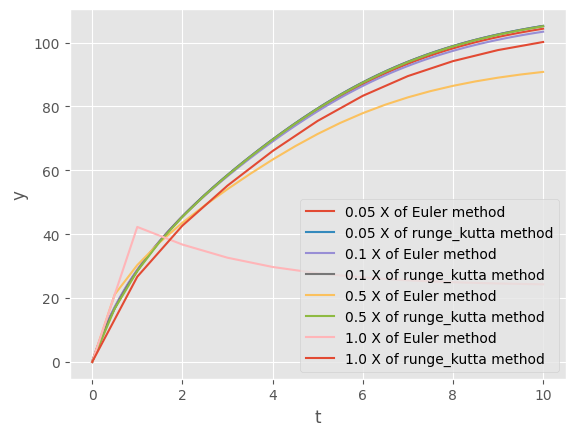

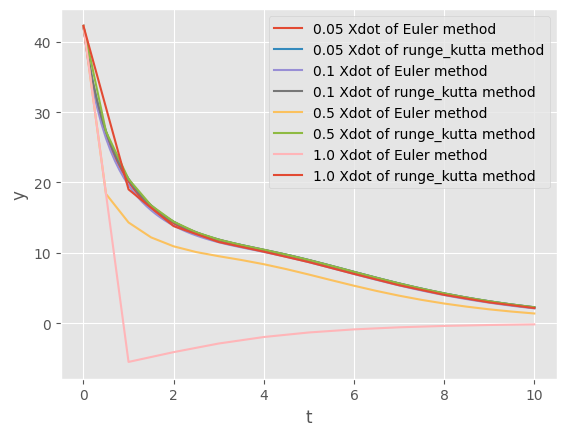

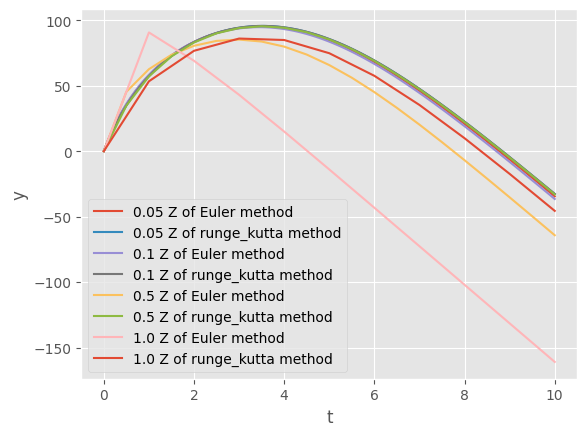

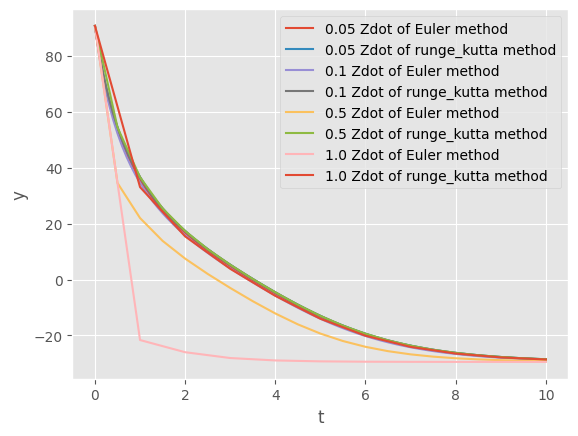

In [19]:
# Write your answer (b)
# YOUR CODE HERE
m =0.2 
CD = 0.47
r = 0.05
Sref = np.pi*r**2
g = 9.81
rho = 1.225
x0 = 0
z0 = 0
v0 = 100
vx0 = v0*np.cos(65*np.pi/180)
vz0 = v0*np.sin(65*np.pi/180)

y0 = np.array([x0, vx0, z0, vz0])

def dfdt(t, y) : #[x, xp, z, zp] 이 순서로 y를 저장한다.
    return np.array([y[1], -0.5/m*CD*rho*Sref*np.sqrt((y[1])**2 + (y[3])**2)*y[1], y[3], -0.5/m*CD*rho*Sref*np.sqrt((y[1])**2+(y[3]**2))*y[3]-g])

h_list = [0.05, 0.1, 0.5, 1.0]

for i in range(len(h_list)) :
    eulert, eulery = explicit_euler(dfdt, (0,10), y0, h_list[i])
    r4t, r4y = runge_kutta4(dfdt, (0,10), y0, h_list[i]) 
    plt.plot(eulert, eulery[0], label =f'{h_list[i]} X of Euler method')
    plt.plot(r4t, r4y[0], label =f'{h_list[i]} X of runge_kutta method')
    plt.legend()
    plt.grid(True)
    plt.xlabel("t")
    plt.ylabel("y")
plt.show()

for i in range(len(h_list)) :
    eulert, eulery = explicit_euler(dfdt, (0,10), y0, h_list[i])
    r4t, r4y = runge_kutta4(dfdt, (0,10), y0, h_list[i]) 
    plt.plot(eulert, eulery[1], label =f'{h_list[i]} Xdot of Euler method')
    plt.plot(r4t, r4y[1], label =f'{h_list[i]} Xdot of runge_kutta method')
    plt.legend()
    plt.grid(True)
    plt.xlabel("t")
    plt.ylabel("y")
plt.show()

for i in range(len(h_list)) :
    eulert, eulery = explicit_euler(dfdt, (0,10), y0, h_list[i])
    r4t, r4y = runge_kutta4(dfdt, (0,10), y0, h_list[i]) 
    plt.plot(eulert, eulery[2], label =f'{h_list[i]} Z of Euler method')
    plt.plot(r4t, r4y[2], label =f'{h_list[i]} Z of runge_kutta method')
    plt.legend()
    plt.grid(True)
    plt.xlabel("t")
    plt.ylabel("y")
plt.show()

for i in range(len(h_list)) :
    eulert, eulery = explicit_euler(dfdt, (0,10), y0, h_list[i])
    r4t, r4y = runge_kutta4(dfdt, (0,10), y0, h_list[i]) 
    plt.plot(eulert, eulery[3], label =f'{h_list[i]} Zdot of Euler method')
    plt.plot(r4t, r4y[3], label =f'{h_list[i]} Zdot of runge_kutta method')
    plt.legend()
    plt.grid(True)
    plt.xlabel("t")
    plt.ylabel("y")
plt.show()

In [27]:
def lagint(xs, fs, x):
    """
    Lagrange Interpolation
    
    Parameters
    ----------
    xs : array
        Data of x
    ys : array
        Data of y
    x: float
        Point to interpolate
    """
    # YOUR CODE HERE
    f = 0
    for xi, fi in zip(xs, fs) :
        Li = 1
        for xj in xs :
            if xj != xi :
                Li *= (x-xj)/(xi-xj)
        
        f += Li*fi
    

    return f

In [30]:
# Write your answer (c)
# Save the value of distance and time in variable 'yend' and 'tend'.
# Print 'yend' and 'tend'
# YOUR CODE HERE
r4t, r4y = runge_kutta4(dfdt, (0,10), y0, 0.1)
z_impact = np.where(r4y[2]<0)[0][0]

t_int_point = np.array([r4t[z_impact-2], r4t[z_impact-1], r4t[z_impact], r4t[z_impact+1]])
z_int_point = np.array([r4y[2][z_impact-2], r4y[2][z_impact-1], r4y[2][z_impact], r4y[2][z_impact+1]])
x_int_point = np.array([r4y[0][z_impact-2], r4y[0][z_impact-1], r4y[0][z_impact], r4y[0][z_impact+1]])

tend = lagint(z_int_point, t_int_point, 0)
yend = lagint(t_int_point, x_int_point, tend)

print(f"지표면과 충돌 시간 : {tend}")
print(f"충돌시 도달거리 : {yend}")

지표면과 충돌 시간 : 8.835790026386505
충돌시 도달거리 : 102.00445995201157


In [7]:
# Do not remove!

First solution: 10.805432194017389
Second solution: 58.66797043976697
Time Difference: 5.773339691090344


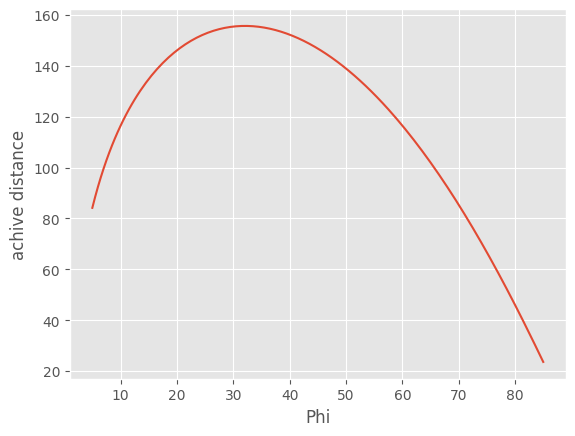

In [56]:
# Solution for (d)
# Save the value of first solution, second solution and time difference in variable 'a', 'b' and 't'.
"""
Example
print("First solution:", )
print("Second solution:", )
print("Time Difference:", )
"""
# YOUR CODE HERE
def cal_dis_from_angle(phi_deg, tspan, h) : 
    phi_rad = np.deg2rad(phi_deg)
    y0 = np.array([0, v0*np.cos(phi_rad), 0, v0*np.sin(phi_rad)])
    r4t, r4y = runge_kutta4(dfdt, tspan, y0, h)

    z_impact = np.where(r4y[2]<0)[0][0]

    t_int_point = np.array([r4t[z_impact-2], r4t[z_impact-1], r4t[z_impact], r4t[z_impact+1]])
    z_int_point = np.array([r4y[2][z_impact-2], r4y[2][z_impact-1], r4y[2][z_impact], r4y[2][z_impact+1]])
    x_int_point = np.array([r4y[0][z_impact-2], r4y[0][z_impact-1], r4y[0][z_impact], r4y[0][z_impact+1]])

    tend = lagint(z_int_point, t_int_point, 0)
    yend = lagint(t_int_point, x_int_point, tend)

    return tend, yend

phi_list = np.arange(5, 85, 0.5)
phi_list = np.insert(phi_list, len(phi_list), 85)

range_data = []
for i in range(len(phi_list)) :
    tdata, xdata = cal_dis_from_angle(phi_list[i], (0,20), 0.1)
    range_data.append(xdata)

plt.plot(phi_list, range_data)
plt.xlabel("Phi")
plt.ylabel("achive distance")

def obj(phi_deg) :
     tend, yend = cal_dis_from_angle(phi_deg, (0,20), 0.1)
     return yend - 120 

from scipy.optimize import root_scalar

root1 = root_scalar(obj, bracket =[10, 20])
root2 = root_scalar(obj, bracket =[50, 60])
time_difference = cal_dis_from_angle(root2.root, (0,20), 0.1)[0] - cal_dis_from_angle(root1.root, (0,20), 0.1)[0]

print("First solution:", root1.root)
print("Second solution:", root2.root)
print("Time Difference:", time_difference)

In [9]:
# Do not remove!

## Problem #3 (20pt)
The air properties vary with height, and the US Standard Atmosphere 1976 model is widely used. The attached `air.csv` file contains air properties up to $20 \, \text{km}$. You can load this file using:  

```python
data = np.loadtxt('air.csv', skiprows=1, delimiter=',').T
altitude, density = data[0], data[6]
```

**(a)** Polynomial Regression for Air Density (8pt)
- Create your own function to perform polynomial regression and evaluate the values.
- Do not use scipy and numpy function.
- Use your function to find a polynomial regression model for air density ($\rho$) as a function of altitude ($z$), **ensuring a correlation coefficient $R > 0.999$.**

**(b)** Paratrooper Problem with Constant Density (6pt)
- Solve the following equation of motion:

    $$
    -F_g + D = m \ddot{z}
    $$

    where:

   * $F_g=mg$: gravitational force
   * $D$: aerodynamic drag using the drag coeffcient ($C_D=\frac{D}{0.5 \rho V^2 S_{ref}}$)
   
- Use the following parameters:

   * $m = 80 \text{kg}$, $C_D = 1.75$,  
   * Radius of parachute: $r = 1 \, \text{m}$,  
   * Reference area: $S_{ref} = \pi r^2$,  
   * Gravitational acceleration: $g = 9.81 \, \text{m/s}^2$,  
   * Constant air density: $\rho=1.2 kg/m^3$.
   
- The paratrooper starts at an altitude of 5 km. Solve the equation using the 4th-Order Runge-Kutta method up to $t=200$ s.
   * Time step: $\Delta t = 0.1$

**(c)** Paratrooper Problem with Variable Density (6pt)
- Use the curve-fitted polynomial function for air density from part (a) to solve the same paratrooper problem with variable air density ($\rho(z)$)

- Compare the trajectory and velocity profiles with the results from part (b)

0.9997821219236968
[ 1.21122803 -0.10533244  0.00249005]


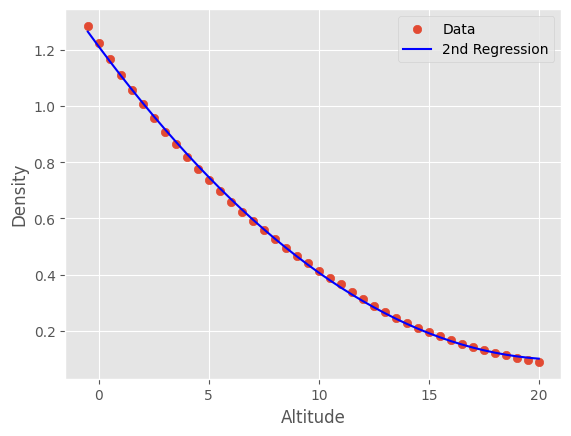

In [67]:
# Write your answer (a)
# Plot your regression function and show that the correlation coefficient R > 0.999.
# YOUR CODE HERE
data = np.loadtxt('air.csv', skiprows=1, delimiter=',').T
altitude, density = data[0], data[6]

def polyreg(x, y, n):
    """
    Regression for polynomial
    
    Parameters
    ----------
    x : array
        x
    y : array
        y
    n : integer
        order
    
    Returns
    --------
    z : array
        coeffcient of polynomials
    r : float
        correlation coefficient
    """
    # YOUR CODE HERE
    A = np.zeros((n+1,n+1))
    b = np.zeros(n+1)
    for i in range(n+1) :
        b[i] = sum(y*x**i)
        for j in range(n+1) :
            A[i,j] = sum(x**(i+j))
    z = np.linalg.solve(A, b)
    poly = 0
    for i in range(0,len(z)) :
        poly += z[i]*x**i
    Sr = sum((y-poly)**2)
    St = sum((y-y.mean())**2)
    r2 = (St-Sr)/St
    r = np.sqrt(r2)
    print(r)

    def regression_function(x) :
        result = 0
        for i in range(0,len(z)) :
            result += z[i]*x**i
        return result
    return z, regression_function

density_regression, function = polyreg(altitude, density,2)
print(density_regression) #상관계수가 0.999보다 크기 위해서 2차 이상의 regression을 해주어야한다. 

plt.scatter(altitude, density, label ='Data')
plt.plot(altitude, function(altitude), color='b', label ='2nd Regression')
plt.xlabel("Altitude")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()

In [85]:
# Write your answer (b)
# Save the value of height and density in variable 'height1' and 'density1'.
# YOUR CODE HERE
m = 80
CD = 1.75
r = 1
Sref = np.pi*r**2
g = 9.81
rho = 1.2
z0 = 5000
vz0 = 0
y0 = np.array([z0, vz0])
def dzdt(t, y) :
    return np.array([y[1], -g+0.5*rho*(y[1])**2*Sref*CD/m])

r4t, r4y = runge_kutta4(dzdt, (0,200), y0, 0.01)

height1 = r4y[0][-1]
density1 = function(height1/1000)

print(f"고도 : {height1}")
print(f"밀도 : {density1}")

고도 : 1931.9187385174962
밀도 : 1.0170279516112912


In [12]:
# Do not remove!

In [87]:
# Write your answer (c)
# Save the value of height and density in variable 'height2' and 'density2'.
# Compare constant model and variable model
# YOUR CODE HERE
def variable_rho_dzdt(t, y) :
    return np.array([y[1], -g+0.5*function(y[0]/1000)*(y[1])**2*Sref*CD/m])

r4t, r4y = runge_kutta4(variable_rho_dzdt, (0,200), y0, 0.01)

height2 = r4y[0][-1]
density2 = function(height2/1000)

print(f"고도 : {height2}")
print(f"속도 : {density2}")
#고도가 높을때는 밀도가 작아서 항력의 값이 작아서 항력의 영향을 덜 받은 c의 고도가 더 빨리 낮아진 것이다.

고도 : 1454.6905174989806
속도 : 1.0632711807273725


In [14]:
# Do not remove!